# Lab 05 - Ohm's Law

Edit this cell and provide the information requested:

- Your name:
- Your student number:
- Partner's name:

In [10]:
import numpy as np
import data_entry
import matplotlib.pyplot as plt

## Part A - Grading feedback, overview of the day [0h00-0h05]

***After reviewing and hearing feedback from the last lab, write some notes below about what you learned/what you could improve for this week.***

## Part B - Familiarize, Part 1 (Circuits and Multimeters)

***After the class discussion for Ohm's law, how to construct circuits, and using multimeters, write down anything that may be helpful for your understanding and for conducting the experiment this week.***

- Ohm's law relates the voltage, current, and resistance of/through a circuit element. It is given by:
$$ V = IR$$.
- Given a resistor of unknown resistance, we can vary the voltage across it, and make measurements of voltage and current at various points. If the relationship is linear, then we can use Ohm's law to extract the resistance from this data.
- (Some notes about how to use multimeters - series for I, parallel for V. Different terminals for I and V measurements)

## Part C - Familiarize, Part 2 (Explore the Equipment and Develop a Measurement Strategy)

***Using the multimeter to measure the voltage of the source and the current through the circuit, take a few initial datapoints of voltage and current. Take notes from what you learn from experimenting with the equipment.***

- We make current and voltage measurements - ideal ranges are 0-15 V (20V scale) and 0-20 mA.
- Readings of voltage and current are stable for the most part.
- Uncertainty in voltage is instrumental (stable fixed reading from the multimeter). Use half of the most significant digit divided by $\sqrt{3}$ to obtain the uncertainty. 
- Uncertainty in current is instrumental (stable fixed reading from the multimeter). Use half of the most significant digit divided by $\sqrt{3}$ to obtain the uncertainty.
- **The multimeter manual suggests 0.5%/1% + 1 digit (but this produces very large uncertainties compared to fluctuations), so the manipulation/estimation of uncertainties here is actually a bit subtle if we want the uncertainties to work the way we want.** As long as we keep the meters on fixed ranges, the "divide by $2\sqrt{3}$ strategy" should work well.
- The resistance is chosen so that the uncertainty in the current should always be larger than that in the voltage, so that ignoring the uncertainty in voltage is reasonable.
- **Data here is totally made up, assuming a resistor of 1300 kOhm, and assuming Ohm's law basically holds perfectly (which for the resistor is true; no longer holds for the lightbulb). The fluctuations probably aren't consistent with what is actually observed.**

In [15]:
# uncertainties in V and mA:

uV = 0.01/2/np.sqrt(3)
print(uV)
uI = .01/2/np.sqrt(3)
print(uI)


0.002886751345948129
0.002886751345948129


## Part D - Familiarize, Part 3 (Develop Measurement Strategy)

***Describe your measurement strategy based on the familiarization step above.***

- As before, we take data over evenly spaced voltage points so as to not focus on a single region of parameter space over another.
- We expand our voltage range from 0.2V-1V to 0.1V-2.0V, and instead of 0.2V increments, we use 0.1V increments to obtain a higher quality dataset (more dense, when we fit a linear model to it later will be more constrained). Taking data over a larger range will also help us to see if the linearity of the data may break down in some region.

## Part D - Measure and Analyze (Collect Data and Make a Scatter Plot)

In [16]:
de2 = data_entry.sheet("lab05_data")

Sheet name: lab05_data.csv


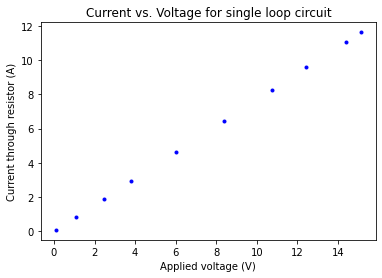

In [17]:
plt.errorbar(VVec, IVec, uIVec, fmt = "bo", markersize = 3, label = "Experimental data")
plt.title("Current vs. Voltage for single loop circuit")
plt.xlabel("Applied voltage (V)")
plt.ylabel("Current through resistor (A)")
plt.show()

The slope can be estimated as:
$$
m \approx \frac{I_2 - I_1}{V_2 - V_1}
$$
for two points $(V_1, I_1), (V_2, I_2)$. 

In [23]:
approxm = (IVec[-1] - IVec[0])/(VVec[-1] - VVec[0])
approxR = 1/approxm
print(approxR, "kOhms")

1.2996968384582073 kOhms


- The data in the above plot appears linear, which is what we expected.
- The resistance can be calculated as the inverse of the slope of the above plot, which we can estimate to be 1k$\Omega$.
- Next time, we can improve our dataset by taking more datapoints over a larger range and seeing if the linear behavior holds over a larger range; this will be a valid improvement as our slope will be more constrained by the additional datapoints. We can also take multiple measurements and average the results to decrease our uncertainty in individual points (and hence improve the quality of the slope).

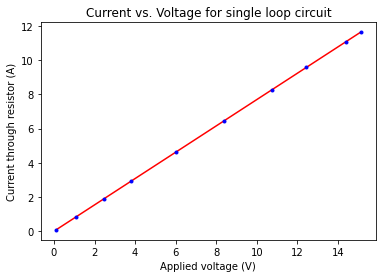

In [24]:
# make plot again with line representing this line:
xmin = np.min(VVec)
xmax = np.max(VVec)
xvals = np.linspace(xmin, xmax, 200)
yvals = xvals/approxR

plt.plot(xvals, yvals, "r-", label = "I = V/R")
plt.errorbar(VVec, IVec, uIVec, fmt = "bo", markersize = 3, label = "Experimental data")
plt.title("Current vs. Voltage for single loop circuit")
plt.xlabel("Applied voltage (V)")
plt.ylabel("Current through resistor (A)")
plt.show()

## Part E - IMPROVE, COMPARE, SUMMARIZE, REFLECT

